# Exploring the dataset

## Importing the data

Just take a quick look to the data

In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
kobe = pd.DataFrame.from_csv("./data/data.csv", sep=",", index_col=False)

In [211]:
kobe.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5


In [212]:
kobe.shape

(30697, 25)

In [213]:
kobe.columns

Index([u'action_type', u'combined_shot_type', u'game_event_id', u'game_id',
       u'lat', u'loc_x', u'loc_y', u'lon', u'minutes_remaining', u'period',
       u'playoffs', u'season', u'seconds_remaining', u'shot_distance',
       u'shot_made_flag', u'shot_type', u'shot_zone_area', u'shot_zone_basic',
       u'shot_zone_range', u'team_id', u'team_name', u'game_date', u'matchup',
       u'opponent', u'shot_id'],
      dtype='object')

In [214]:
kobe.dtypes

action_type            object
combined_shot_type     object
game_event_id           int64
game_id                 int64
lat                   float64
loc_x                   int64
loc_y                   int64
lon                   float64
minutes_remaining       int64
period                  int64
playoffs                int64
season                 object
seconds_remaining       int64
shot_distance           int64
shot_made_flag        float64
shot_type              object
shot_zone_area         object
shot_zone_basic        object
shot_zone_range        object
team_id                 int64
team_name              object
game_date              object
matchup                object
opponent               object
shot_id                 int64
dtype: object

In [215]:
kobe.count()

action_type           30697
combined_shot_type    30697
game_event_id         30697
game_id               30697
lat                   30697
loc_x                 30697
loc_y                 30697
lon                   30697
minutes_remaining     30697
period                30697
playoffs              30697
season                30697
seconds_remaining     30697
shot_distance         30697
shot_made_flag        25697
shot_type             30697
shot_zone_area        30697
shot_zone_basic       30697
shot_zone_range       30697
team_id               30697
team_name             30697
game_date             30697
matchup               30697
opponent              30697
shot_id               30697
dtype: int64

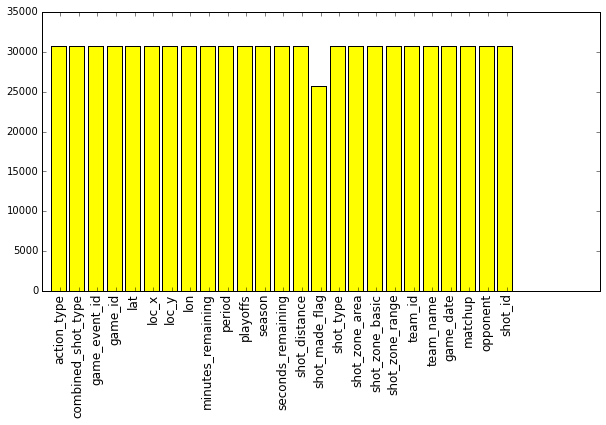

In [216]:
plt.figure(figsize=(10,5))
locx = np.arange(len(kobe.columns))
plt.bar(locx+0.5,kobe.count(),color="yellow")
plt.xticks(locx+1, kobe.columns, rotation=90, size=12)
plt.show()

There is no NaN values except that in the target column 'shot_made_flag'

In [217]:
kobe["shot_made_flag"].unique()

array([ nan,   0.,   1.])

## Exploring the columns

We create an empty list to add the variables that will prove to be useless for the predictive model. Later on we will drop them out all together.

In [218]:
variables_to_drop = []

### Action type, combined shot type and shot type

In [219]:
len(kobe["action_type"].unique())

57

In [220]:
len(kobe["combined_shot_type"].unique())

6

In [221]:
len(kobe["shot_type"].unique())

2

In [222]:
print kobe["action_type"].unique()
print kobe["combined_shot_type"].unique()
print kobe["shot_type"].unique()

['Jump Shot' 'Driving Dunk Shot' 'Layup Shot' 'Running Jump Shot'
 'Driving Layup Shot' 'Reverse Layup Shot' 'Reverse Dunk Shot'
 'Slam Dunk Shot' 'Turnaround Jump Shot' 'Tip Shot' 'Running Hook Shot'
 'Alley Oop Dunk Shot' 'Dunk Shot' 'Alley Oop Layup shot'
 'Running Dunk Shot' 'Driving Finger Roll Shot' 'Running Layup Shot'
 'Finger Roll Shot' 'Fadeaway Jump Shot' 'Follow Up Dunk Shot' 'Hook Shot'
 'Turnaround Hook Shot' 'Running Tip Shot' 'Jump Hook Shot'
 'Running Finger Roll Shot' 'Jump Bank Shot' 'Turnaround Finger Roll Shot'
 'Hook Bank Shot' 'Driving Hook Shot' 'Running Reverse Layup Shot'
 'Driving Finger Roll Layup Shot' 'Fadeaway Bank shot' 'Pullup Jump shot'
 'Finger Roll Layup Shot' 'Turnaround Fadeaway shot'
 'Driving Reverse Layup Shot' 'Driving Slam Dunk Shot'
 'Step Back Jump shot' 'Reverse Slam Dunk Shot' 'Turnaround Bank shot'
 'Running Finger Roll Layup Shot' 'Floating Jump shot'
 'Putback Slam Dunk Shot' 'Running Bank shot' 'Driving Bank shot'
 'Putback Layup Shot'

These three variables represent different types of shots. 'shot_type' has only two values. It doesn't seem too descriptive.

In [223]:
variables_to_drop.extend(["shot_type"])

### Game event id and game id

In [224]:
len(kobe["game_event_id"].unique())

620

In [225]:
unique_game_event_id = kobe["game_event_id"].unique()

In [226]:
unique_game_event_id.sort()

In [227]:
unique_game_event_id

array([  2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,
        15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
        28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,
        41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,
        54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,
        67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,
        80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
        93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105,
       106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
       119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131,
       132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144,
       145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157,
       158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170,
       171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 18

In [228]:
len(kobe["game_id"].unique())

1559

In [229]:
unique_game_id = kobe["game_id"].unique()

In [230]:
unique_game_id.sort()

In [231]:
unique_game_id

array([20000012, 20000019, 20000047, ..., 49900086, 49900087, 49900088])

'game_event_id' identifies the event among all the others (including the shots made by other players). 'game_id' signals the match within the season when the shoot was thrown.

### Position (loc_x, loc_y, lon, and lat)

In [232]:
kobe[["lat", "lon", "loc_x", "loc_y"]].describe()

,lat,lon,loc_x,loc_y
count,30697.000000,30697.000000,30697.000000,30697.000000
mean,33.953192,-118.262690,7.110499,91.107535
std,0.087791,0.110125,110.124578,87.791361
min,33.253300,-118.519800,-250.000000,-44.000000
25%,33.884300,-118.337800,-68.000000,4.000000
50%,33.970300,-118.269800,0.000000,74.000000
75%,34.040300,-118.174800,95.000000,160.000000
max,34.088300,-118.021800,248.000000,791.000000


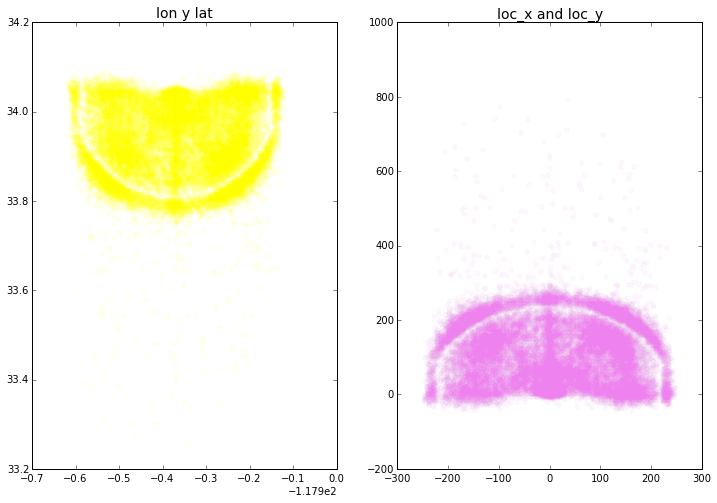

In [233]:
plt.figure(figsize=(12,8))

plt.subplot(121)
plt.scatter(kobe.lon, kobe.lat, color="yellow", alpha=0.05)
plt.title("lon y lat", size=14)

plt.subplot(122)
plt.scatter(kobe.loc_x, kobe.loc_y, color="violet", alpha=0.05)
plt.title("loc_x and loc_y", size=14)

'lon' y 'lat' represent the coordinates of the spot from where the shot was thrown. They equal 'loc_x' y 'loc_y'.

In [234]:
variables_to_drop.extend(["lat", "lon"])

### Time remaining (minutes_remaining and seconds_remaining)

In [235]:
kobe["seconds_to_period_end"] = 60 * kobe["minutes_remaining"] + kobe["seconds_remaining"]

In [236]:
kobe[["minutes_remaining", "seconds_remaining", "seconds_to_period_end"]].head(20)

,minutes_remaining,seconds_remaining,seconds_to_period_end
0,10,27,627
1,10,22,622
2,7,45,465
3,6,52,412
4,6,19,379
5,9,32,572
6,8,52,532
7,8,5,485
8,6,12,372
9,3,36,216


After adding up the values from both columns in 'seconds_to_period_end', it doesn't seem that 'minutes_remaining' and 'seconds_remaining' are of any use.

In [237]:
variables_to_drop.extend(["minutes_remaining", "seconds_remaining"])

### Period, Season, and Playoffs

In [238]:
print kobe["period"].unique()
print kobe["season"].unique()
print kobe["playoffs"].unique()

[1 2 3 4 5 6 7]
['2000-01' '2001-02' '2002-03' '2003-04' '2004-05' '2005-06' '2006-07'
 '2007-08' '2008-09' '2009-10' '2010-11' '2011-12' '2012-13' '2013-14'
 '2014-15' '2015-16' '1996-97' '1997-98' '1998-99' '1999-00']
[0 1]


### Shot distance

We create the column 'accurate_shot_distance' using the Distance Formula and then we round to the decimal.

In [239]:
kobe["accurate_shot_distance"] = np.sqrt(kobe['loc_x']**2 + kobe['loc_y']**2)/10

In [240]:
kobe["accurate_shot_distance"] = kobe["accurate_shot_distance"].round(1)

In [241]:
kobe[["shot_distance", "accurate_shot_distance"]]

,shot_distance,accurate_shot_distance
0,18,18.2
1,15,15.7
2,16,16.9
3,22,22.3
4,0,0.0
5,14,14.5
6,0,0.0
7,2,2.8
8,12,12.6
9,12,12.9


In [242]:
len(kobe["accurate_shot_distance"].unique())

455

In [243]:
len(kobe["shot_distance"].unique())

74

### Shot zone: shot zone area, shot zone basic, shot zone range

In [244]:
print kobe["shot_zone_area"].unique()
print kobe["shot_zone_basic"].unique()
print kobe["shot_zone_range"].unique()

['Right Side(R)' 'Left Side(L)' 'Left Side Center(LC)'
 'Right Side Center(RC)' 'Center(C)' 'Back Court(BC)']
['Mid-Range' 'Restricted Area' 'In The Paint (Non-RA)' 'Above the Break 3'
 'Right Corner 3' 'Backcourt' 'Left Corner 3']
['16-24 ft.' '8-16 ft.' 'Less Than 8 ft.' '24+ ft.' 'Back Court Shot']


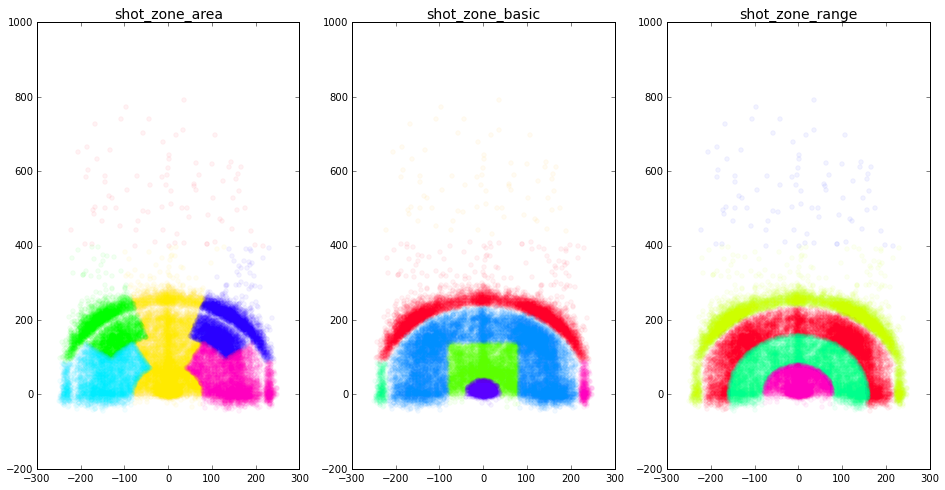

In [245]:
import matplotlib.cm as cm

plt.figure(figsize=(16,8))

def scatter_plot_by_shot_zone_col(shot_zone_col):
    alpha = 0.05
    groups = kobe.groupby(shot_zone_col)
    colors = cm.gist_rainbow(np.linspace(0, 1, len(groups)))
    for group, color in zip(groups, colors):
        plt.scatter(group[1].loc_x, group[1].loc_y, color=color, alpha=alpha)

plt.subplot(131)
scatter_plot_by_shot_zone_col("shot_zone_area")
plt.title("shot_zone_area", size=14)

plt.subplot(132)
scatter_plot_by_shot_zone_col("shot_zone_basic")
plt.title("shot_zone_basic", size=14)

plt.subplot(133)
scatter_plot_by_shot_zone_col('shot_zone_range')
plt.title("shot_zone_range", size=14)

As we can see, these are three different categorical segmentations of the spot from where the shot was thrown.

### Team (team_id and team_name)

In [246]:
print kobe["team_id"].unique()
print kobe["team_name"].unique()

[1610612747]
['Los Angeles Lakers']


There is only one value in each column (K. Bryant played only for one team during his NBA career), so we can drop both columns out.

In [247]:
variables_to_drop.extend(["team_id", "team_name"])

### Game date

We convert "game_date" to datetime format. Then we split it into three new columns: "game_year", "game_month", and "game_weekday" (0 = Monday, 6 = Sunday).

In [248]:
kobe["game_date"].sample(10)

27984    2007-04-29
2779     2002-03-17
28353    2008-05-29
19349    2012-04-04
27446    2004-05-05
20222    2013-01-15
14825    2009-04-10
25527    2000-01-30
12221    2008-01-14
20607    2013-02-28
Name: game_date, dtype: object

In [249]:
kobe["game_date"] = pd.to_datetime(kobe["game_date"])

In [250]:
kobe["game_year"] = kobe["game_date"].dt.year
kobe["game_month"] = kobe["game_date"].dt.month
kobe["game_dayofweek"] = kobe["game_date"].dt.dayofweek
kobe["game_dayofyear"] = kobe["game_date"].dt.dayofyear

In [251]:
game_dayofweek_list = kobe["game_dayofweek"].unique()

In [252]:
game_dayofweek_list.sort()

In [253]:
print game_dayofweek_list

[0 1 2 3 4 5 6]


In [254]:
game_dayofyear_list = kobe["game_dayofyear"].unique()

In [255]:
game_dayofyear_list.sort()

In [256]:
print game_dayofyear_list

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 171 299 300 301 302 303 304 305 306 307 308
 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323 324 325 326
 327 328 329 330 331 332 333 334 335 336 337 338 339 340 341 342 343 344
 345 346 347 348 349 350 351 352 353 354 355 356 357 358 359 360 361 362
 363 364 365]


In [257]:
kobe[["game_year", "game_month", "game_dayofweek", "game_dayofyear"]].sample(10)

,game_year,game_month,game_dayofweek,game_dayofyear
10008,2006,12,6,344
19687,2012,11,4,335
9272,2006,3,4,76
9637,2006,4,4,104
16534,2010,11,4,309
18578,2012,1,6,29
29176,2010,5,1,124
25405,2000,1,4,14
2928,2002,3,6,90
21472,2014,12,1,336


In [258]:
kobe[["game_year", "game_month", "game_dayofweek", "game_dayofyear"]].dtypes

game_year         int64
game_month        int64
game_dayofweek    int64
game_dayofyear    int64
dtype: object

The variable 'game_date', which is a datetime object, shall not be useful for the predictive model (LogisticRegression), that accepts only numerical values. So we drop it out.

In [259]:
variables_to_drop.extend(["game_date"])

### Match-up and opponent

In [260]:
kobe[["matchup", "opponent"]].head(20)

,matchup,opponent
0,LAL @ POR,POR
1,LAL @ POR,POR
2,LAL @ POR,POR
3,LAL @ POR,POR
4,LAL @ POR,POR
5,LAL @ POR,POR
6,LAL @ POR,POR
7,LAL @ POR,POR
8,LAL @ POR,POR
9,LAL @ POR,POR


"matchup" columnn informs if the match took place home or away (depending on whether it contains "vs." or "@"), so we create a new column "local" where "1" means the match took place home and "0" means away. Then we drop "matchup" out.

In [261]:
kobe["local"] = kobe["matchup"].str.contains("vs.").astype(int)

In [262]:
kobe["local"].unique()

array([0, 1])

In [263]:
kobe[["matchup", "local"]].head(20)

,matchup,local
0,LAL @ POR,0
1,LAL @ POR,0
2,LAL @ POR,0
3,LAL @ POR,0
4,LAL @ POR,0
5,LAL @ POR,0
6,LAL @ POR,0
7,LAL @ POR,0
8,LAL @ POR,0
9,LAL @ POR,0


After creating the variable 'local', we don't need 'matchup' anymore.

In [264]:
variables_to_drop.extend(["matchup"])

### Shot Id

We set "shot_id" as index and drop the column out.

In [265]:
kobe.set_index("shot_id", inplace=True)

_______________________________________________________________________________________________________________________

Now we export the modified dataset to take a look at data on Tableau, in search of new interesting variables to add to the dataset.

In [266]:
kobe = kobe.drop(variables_to_drop, axis=1)

In [270]:
kobe.to_csv("./data/kobe_searching_for_new_variables.csv", sep= ",")